In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

# reflect the tables

Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results 

results = session.query()

# Calculate the date 1 year ago from the last data point in the database
#date = dt.datetime(2017, 8, 23)
date = dt.datetime(2016, 8, 23)

results = session.query(Measurement.prcp, Measurement.date).\
filter(Measurement.date > date).all()
    
print(results)

df = pd.DataFrame
# List Comprehension Solution
# ptps = [result[0] for result in results]





# Perform a query to retrieve the data and precipitation scores



# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


[(0.08, '2016-08-24'), (0.08, '2016-08-25'), (0.0, '2016-08-26'), (0.0, '2016-08-27'), (0.01, '2016-08-28'), (0.0, '2016-08-29'), (0.0, '2016-08-30'), (0.13, '2016-08-31'), (0.0, '2016-09-01'), (0.0, '2016-09-02'), (0.0, '2016-09-03'), (0.03, '2016-09-04'), (None, '2016-09-05'), (None, '2016-09-06'), (0.05, '2016-09-07'), (0.0, '2016-09-08'), (0.03, '2016-09-09'), (0.0, '2016-09-10'), (0.05, '2016-09-11'), (0.0, '2016-09-12'), (0.02, '2016-09-13'), (1.32, '2016-09-14'), (0.42, '2016-09-15'), (0.06, '2016-09-16'), (0.05, '2016-09-17'), (0.0, '2016-09-18'), (0.0, '2016-09-19'), (0.0, '2016-09-20'), (0.0, '2016-09-21'), (0.02, '2016-09-22'), (0.0, '2016-09-23'), (0.0, '2016-09-24'), (0.0, '2016-09-25'), (0.06, '2016-09-26'), (0.02, '2016-09-27'), (0.0, '2016-09-28'), (0.0, '2016-09-29'), (0.0, '2016-09-30'), (0.0, '2016-10-01'), (0.0, '2016-10-02'), (0.0, '2016-10-03'), (0.0, '2016-10-04'), (0.0, '2016-10-05'), (0.0, '2016-10-06'), (0.0, '2016-10-07'), (0.0, '2016-10-08'), (0.0, '2016-10-

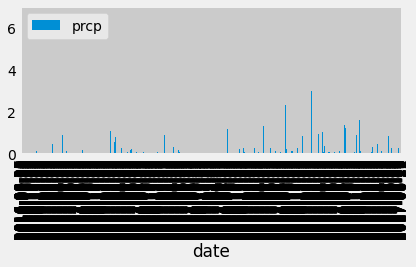

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['prcp', 'date'])
df.set_index('date', inplace=True)
df.plot.bar()
plt.tight_layout()
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [ ]:
# Design a query to show how many stations are available in this dataset?
#look at other table

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
#measurement table - how many rows?
# List the stations and the counts in descending order.
#what is the most active station

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
#use the one station and use temps for a histogram
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
